In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Loading Data

In [2]:
data=pd.read_csv(r"C:\Users\Slmss\Documents\GitHub\DataSet\claimants.csv").dropna()
data.head()

CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        5         0     0.0       1.0       0.0    50.0  34.940
1        3         1     1.0       0.0       0.0    18.0   0.891
2       66         1     0.0       1.0       0.0     5.0   0.330
3       70         0     0.0       1.0       1.0    31.0   0.037
4       96         1     0.0       1.0       0.0    30.0   0.038

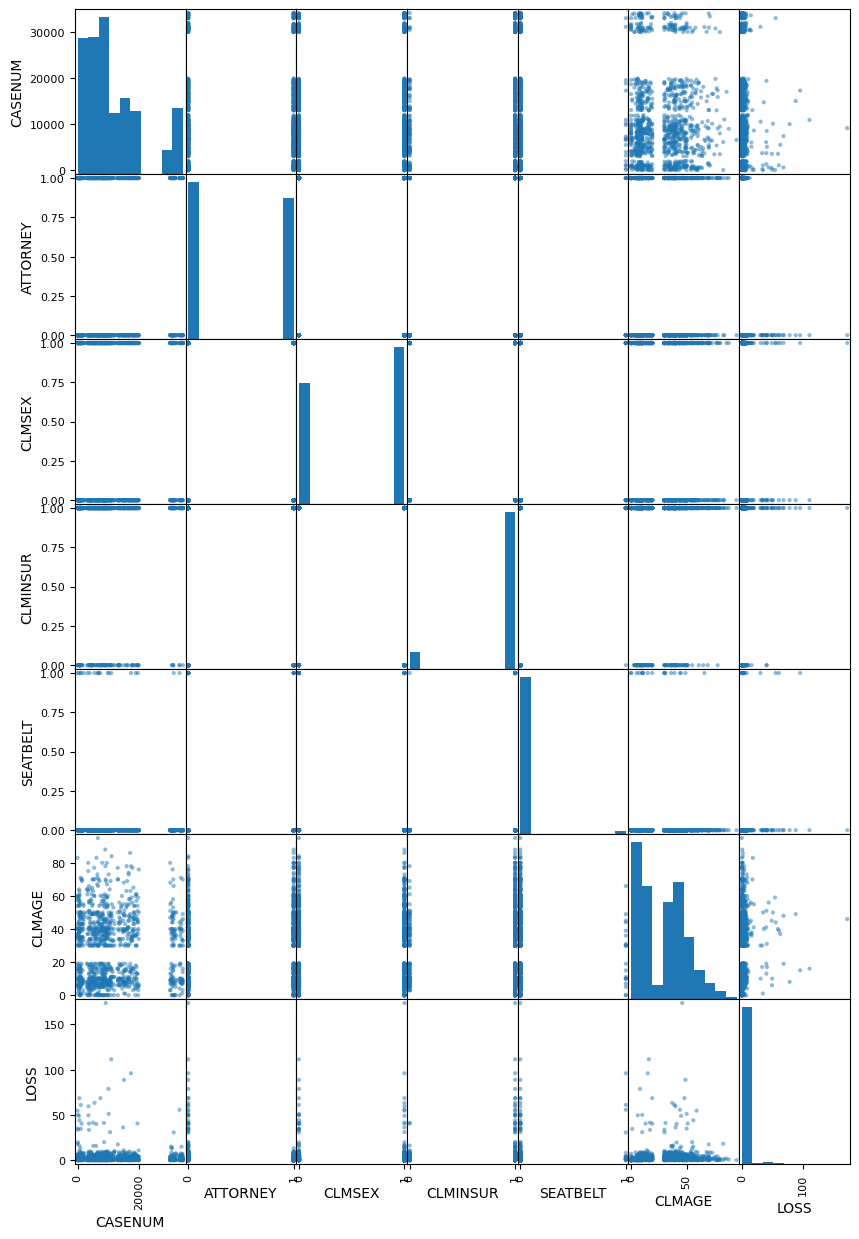

In [3]:
pd.plotting.scatter_matrix(data,figsize=(10,15))
plt.show()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1096 non-null   int64  
 1   ATTORNEY  1096 non-null   int64  
 2   CLMSEX    1096 non-null   float64
 3   CLMINSUR  1096 non-null   float64
 4   SEATBELT  1096 non-null   float64
 5   CLMAGE    1096 non-null   float64
 6   LOSS      1096 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 68.5 KB


In [5]:
data1=data.drop('CASENUM',axis=1)
data1.head()

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0         0     0.0       1.0       0.0    50.0  34.940
1         1     1.0       0.0       0.0    18.0   0.891
2         1     0.0       1.0       0.0     5.0   0.330
3         0     0.0       1.0       1.0    31.0   0.037
4         1     0.0       1.0       0.0    30.0   0.038

In [6]:
mnx=StandardScaler()
# for i in data1.columns:
#     if i=='ATTORNEY':
#         continue
#     else:
data1['CLMAGE']=mnx.fit_transform(data1[['CLMAGE']])
data1['LOSS']=mnx.fit_transform(data1[['LOSS']])

In [7]:
X,Y=data1.iloc[:,1:],data1.iloc[:,0]

In [8]:
X.head()

CLMSEX  CLMINSUR  SEATBELT    CLMAGE      LOSS
0     0.0       1.0       0.0  1.050487  2.969245
1     1.0       0.0       0.0 -0.519424 -0.283287
2     0.0       1.0       0.0 -1.157201 -0.336877
3     0.0       1.0       1.0  0.118352 -0.364865
4     0.0       1.0       0.0  0.069292 -0.364770

In [9]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [10]:
x_tr,x_tst,y_tr,y_tst=train_test_split(X,Y,train_size=.80)
f'x_train shape:{x_tr.shape} y_tr.shape:{y_tr.shape} x_tst shape: {x_tst.shape} y_tst.shape:{y_tst.shape}'

'x_train shape:(876, 5) y_tr.shape:(876,) x_tst shape: (220, 5) y_tst.shape:(220,)'

In [11]:
model=LogisticRegression(solver='liblinear',max_iter=1000)

In [12]:
model.fit(x_tr,y_tr)

LogisticRegression(max_iter=1000, solver='liblinear')

In [13]:
pred=model.predict(x_tst)
pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [14]:
from sklearn.metrics import classification_report,RocCurveDisplay,roc_curve,ConfusionMatrixDisplay,confusion_matrix,auc
print(classification_report(y_tst,pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       110
           1       0.75      0.78      0.76       110

    accuracy                           0.76       220
   macro avg       0.76      0.76      0.76       220
weighted avg       0.76      0.76      0.76       220



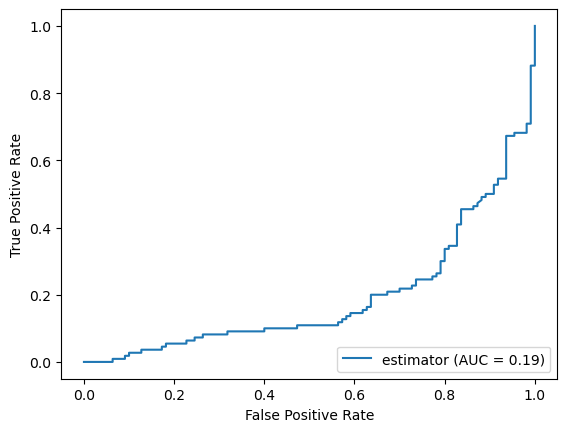

In [15]:
tpr,fpr,trsh=roc_curve(y_tst,model.predict_proba(x_tst)[:,1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()

plt.show()

In [16]:
cnf_matrix=confusion_matrix(y_tst,pred)
cnf_matrix

array([[81, 29],
       [24, 86]], dtype=int64)

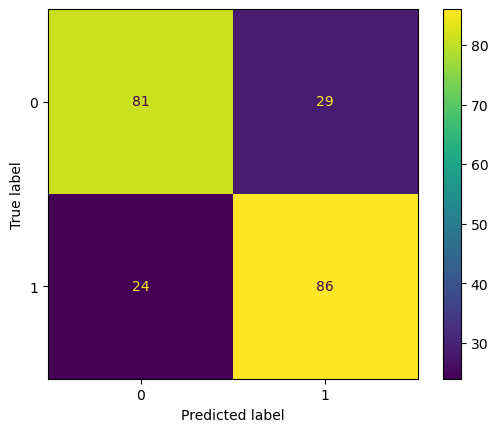

In [17]:
x=ConfusionMatrixDisplay(cnf_matrix,display_labels=model.classes_)
x.plot()
plt.show()

In [18]:
# Calculating TP,FP,TN,TP
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Calculating TPR,FPR,TNR,TPR
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [19]:
import statsmodels.api as sm

In [20]:
data1.head()

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT    CLMAGE      LOSS
0         0     0.0       1.0       0.0  1.050487  2.969245
1         1     1.0       0.0       0.0 -0.519424 -0.283287
2         1     0.0       1.0       0.0 -1.157201 -0.336877
3         0     0.0       1.0       1.0  0.118352 -0.364865
4         1     0.0       1.0       0.0  0.069292 -0.364770

In [21]:
log=sm.Logit(y_tr,x_tr).fit()

Optimization terminated successfully.
         Current function value: 0.615798
         Iterations 7


In [22]:
pred=pd.DataFrame(log.predict(x_tst),columns=['Proba'])
# [f(x) if x is not None else '' for x in xs]
pred['class']=[1 if x >.50 else 0 for x in pred.Proba ]
pred

Proba  class
442   0.625295      1
232   0.376022      0
1058  0.501095      1
704   0.168426      0
1323  0.246192      0
...        ...    ...
1307  0.627581      1
1067  0.164706      0
580   0.213620      0
235   0.524505      1
840   0.579512      1

[220 rows x 2 columns]

In [23]:
print(classification_report(y_tst,pred['class']))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       110
           1       0.70      0.81      0.75       110

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220



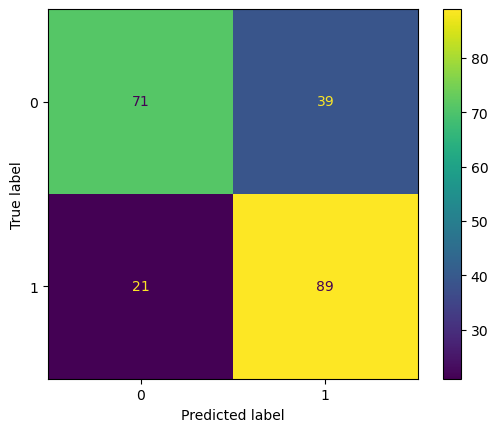

In [24]:
cnf_matrix=confusion_matrix(y_tst,pred['class'])
x=ConfusionMatrixDisplay(cnf_matrix,display_labels=model.classes_)
x.plot()
plt.show()

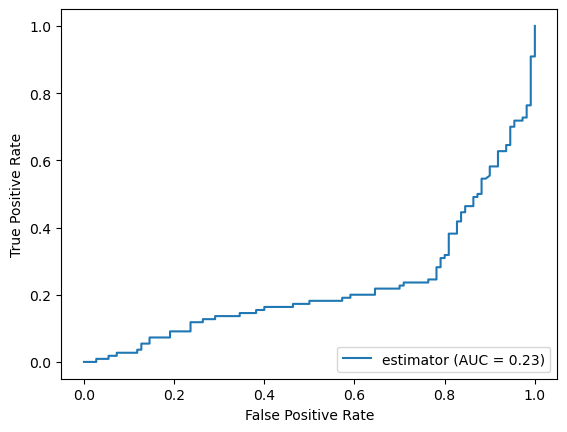

In [25]:
tpr,fpr,trsh=roc_curve(y_tst,pred.Proba)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator')
display.plot()

plt.show()